# 2 Procedure

## 2.1 Understanding the Program

Without delving into the details of the signal processing application, analyze the flow of the C program. \
Observe the data access patterns and identify the critical sequence of accesses which may have a larger \
impact on the performance of the system.

---

O processamento dos Macroblocks.

# 2.3 Cache L1

## 2.3.1 Theory of cache

1. Explain the different types of cache misses: compulsory, capacity, and conflict.

---

**Compulsory:** no 1º acesso a um endereço da cache há miss e o bloco tem de ser copiado da memória para a cache; \
**Capacity:** a cache não tem capacidade para conter todos os blocos necessários à execução do programa (sendo os blocos descartados); \
**Conflict:** múltiplos endereços referenciam a mesma posição da cache.

2. Explain the different types of cache writing-policies.
   
---

**Write-back:** só quando os valores da cache são substituídos é que são atualizados na memória principal; \
**Write-through:** quando um valor é alterado na cache (numa escrita), também é atualizado na memória principal. \

## 2.3.2 Cache L1: dimension and block size

### a)
Consider a memory hierarchy composed of a single cache memory (L1), which interconnects the SDRAM frame memory and the CPU. Considering the characteristics of the available memory devices (see Table 1), and the maximum total cost of the memory hierarchy, determine the maximumstorage space of cache L1.
NOTES:
- the size of any of the memory modules (frame buffer, any cache) must be an integer power of 2: L1_size = 2MAX;
- do not forget to consider the cost of the 128 kByte frame memory.

---

**Frame-memory (SDRAM):**

$128 \hspace{1mm} KB = 128 \times 2^{10} \hspace{1mm} B = 128 \times \frac{2^{10}}{2^{20}} \hspace{1mm} MB = 0.125 \hspace{1mm} MB$

$\text{Frame-memory}_{price} = 0.125 \times 0.01 = 0.00125 \hspace{1mm} €$

**L1 Cache:**

$L1_{price} \leq MAX_{price} - \text{Frame-memory}_{price} \leftrightarrow \\
10 \times L1_{size} \leq 0.020 - 0.00125 \leftrightarrow \\
L1_{size} \leq \frac{0.01875}{10} \leftrightarrow L1_{size} \leq 0.001875 \hspace{1mm} MB$

$0.001875 \hspace{1mm} MB = 0.001875 \times 2^{20} = 1966.8 \hspace{1mm} B$

$2^{MAX} = 19660.8 \leftrightarrow MAX = \lfloor \log_2(1966.8) \rfloor = 10$

**MAX = 10**

### b)
Consider three different dimensions for the L1 data cache: L1_size ∈ {$2^{MAX}$, $2^{MAX-1}$, $2^{MAX-2}$}. \
For each of these dimensions, and assuming a direct mapping configuration, use the dineroIV simulator to evaluate the resulting average data miss-rate considering the following block sizes: \
Block_size ∈ {8, 16, 32, 64}. \
Fill the following table with the obtained data:

---

In [3]:
import pandas as pd 

data_1 = {"": ["Cache size:", "Block size:", "Miss-rate:", "Cost = Price x Miss-rate:"],
          "L1_config_1": ["1024 Bytes", "8 Bytes", 0.0305, 0.00029785]}

data_2 = {"": ["Cache size:", "Block size:", "Miss-rate:", "Cost = Price x Miss-rate:"],
          "L1_config_2": ["1024 Bytes", "16 Bytes", 0.0363, 0.00035449]}

# 1024 B = 0.00097656 MB
# Price = L1_size * price_per_MB = 0.00097656 * 10 = 0.0097656

df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)

display(df_1)
display(df_2)

,,L1_config_1
0,Cache size:,1024 Bytes
1,Block size:,8 Bytes
2,Miss-rate:,0.0305
3,Cost = Price x Miss-rate:,0.000298


,,L1_config_2
0,Cache size:,1024 Bytes
1,Block size:,16 Bytes
2,Miss-rate:,0.0363
3,Cost = Price x Miss-rate:,0.000354


### c)
For each L1 cache size, plot the variation of the miss-rate with the size of the block.

---

In [1]:
import pandas as pd

l1_sizes = {"L1_size = 1024 B": [0.0305, 0.0363, 0.0770, 0.1181],
            "L1_size = 512 B": [0.1247, 0.1184, 0.1492, 0.2021],
            "L1_size = 256 B": [0.1962, 0.1829, 0.2288, 0.3340]}

df = pd.DataFrame(l1_sizes, index = ["Block size = 8 Bytes", "Block size = 16 Bytes", "Block size = 32 Bytes", "Block size = 64 Bytes"])

display(df)

,L1_size = 1024 B,L1_size = 512 B,L1_size = 256 B
Block size = 8 Bytes,0.0305,0.1247,0.1962
Block size = 16 Bytes,0.0363,0.1184,0.1829
Block size = 32 Bytes,0.0770,0.1492,0.2288
Block size = 64 Bytes,0.1181,0.2021,0.3340


### d)
By considering the obtained results, select two L1 cache configurations (dimension and block size) that offer the best trade-off between the cost of the device and the resulting average miss-rate. \
Label in the previous plot the two configurations chosen.

---

Text(0, 0.5, 'Miss-Rate (%)')

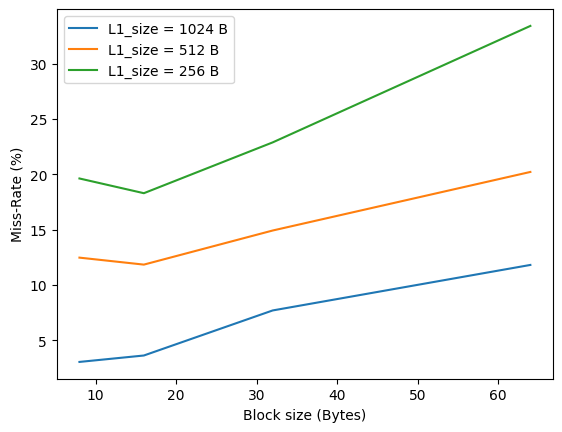

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

l1_sizes = {"L1_size = 1024 B": [3.05, 3.63, 7.70, 11.81],
            "L1_size = 512 B": [12.47, 11.84, 14.92, 20.21],
            "L1_size = 256 B": [19.62, 18.29, 22.88, 33.40]}

df = pd.DataFrame(l1_sizes, index = [8, 16, 32, 64])

df.plot()
plt.xlabel("Block size (Bytes)")
plt.ylabel("Miss-Rate (%)")

## 2.3.3 Cache L1: set associativity

### a)
For each of the two L1 cache setups previously selected, evaluate the compulsory, capacity, conflict and total miss-rates when the following configurations are considered: set associativity of 1 (direct-mapped), 2, 4, 8.
Fill the following table with the obtained data:

---

In [5]:
import pandas as pd

L1_config_1 = {"1-way": [0.0254, 0.0561, 0.9186, 0.0305],
               "2-ways": [0.0216, 0.0488, 0.9295, 0.0357],
               "4-ways": [0.2859, 0.7059, 0.0082, 0.0027],
               "8-ways": [0.2876, 0.7080, 0.0044, 0.0027]}

L1_config_2 = {"1-way": [0.0106, 0.0303, 0.9591, 0.0363],
               "2-ways": [0.0106, 0.0329, 0.9565, 0.0364],
               "4-ways": [0.2444, 0.7556, 0, 0.0016],
               "8-ways": [0.2413, 0.7587, 0, 0.0016]}

df_1 = pd.DataFrame(L1_config_1, index = ["compulsory", "capacity", "conflict", "total"])
df_2 = pd.DataFrame(L1_config_2, index = ["compulsory", "capacity", "conflict", "total"])


display(df_1)
display(df_2)

,1-way,2-ways,4-ways,8-ways
compulsory,0.0254,0.0216,0.2859,0.2876
capacity,0.0561,0.0488,0.7059,0.7080
conflict,0.9186,0.9295,0.0082,0.0044
total,0.0305,0.0357,0.0027,0.0027


,1-way,2-ways,4-ways,8-ways
compulsory,0.0106,0.0106,0.2444,0.2413
capacity,0.0303,0.0329,0.7556,0.7587
conflict,0.9591,0.9565,0.0000,0.0000
total,0.0363,0.0364,0.0016,0.0016


### b)
For each L1 cache setup, draw a plot with the variation of the obtained compulsory, capacity, conflict and total miss-rates for the considered set associativity ways.

---

Text(0, 0.5, 'miss-rate (%)')

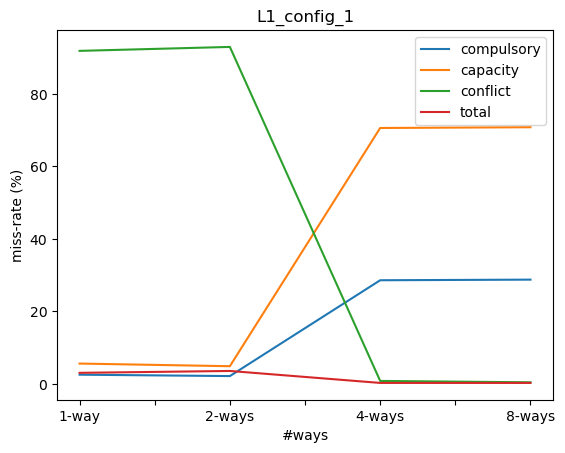

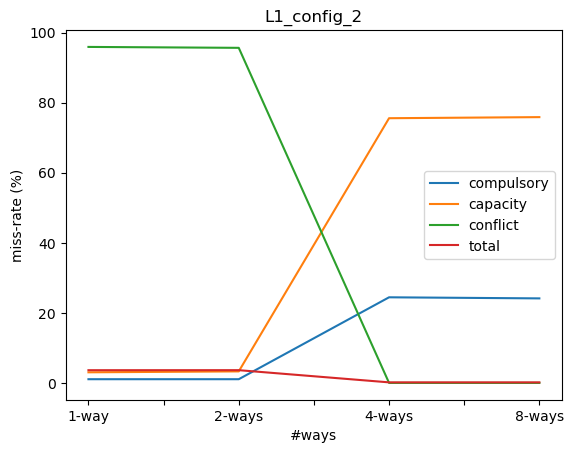

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

L1_config_1 = {"compulsory": [2.54, 2.16, 28.59, 28.76],
               "capacity": [5.61, 4.88, 70.59, 70.80],
               "conflict": [91.86, 92.95, 0.82, 0.44],
               "total": [3.05, 3.57, 0.27, 0.27]}

L1_config_2 = {"compulsory": [1.06	, 1.06, 24.44, 24.13],
               "capacity": [3.03, 3.29, 75.56, 75.87],
               "conflict": [95.91, 95.65, 0, 0],
               "total": [3.63, 3.64, 0.16, 0.16]}


df_1 = pd.DataFrame(L1_config_1, index = ["1-way", "2-ways", "4-ways", "8-ways"])
df_2 = pd.DataFrame(L1_config_2, index = ["1-way", "2-ways", "4-ways", "8-ways"])

df_1.plot()
plt.title("L1_config_1")
plt.xlabel("#ways")
plt.ylabel("miss-rate (%)")

df_2.plot()
plt.title("L1_config_2")
plt.xlabel("#ways")
plt.ylabel("miss-rate (%)")

### c)
Comment the results above.

---

Da análise dos gráficos acima, podemos notar que, com o aumento de vias de associatividade:
- o rate de conflict misses diminui radicalmente, ao ponto de chegar a 0 a partir de 4 vias, algo esperado visto que cada set da cache passa a ser composto por mais posições, e daí mais espaço para guardar palavras que inicialmente ficariam na mesma posição;
- o rate de capacity misses aumenta bastante, o que se deve ao facto da cache estar dividida em menos sets (menos conflicts), tendo por isso maior tendência a encher;
- o rate de compulsory misses aumenta, pois havendo mais vias por entrada, no arranque da cache, o processador irá aceder a mais espaços vazios (originando portanto mais misses);
- a partir de 4 vias de associatividade deixa de se notar alguma diferença significante no miss-rate.

Analisando o miss rate total, concluimos que o aumento de vias de associatividade leva a uma diminuição no miss-rate.

### d)
Write the expression that provides the mean access time as a function of the L1 cache hit $(p^{L1}_H)$ and miss $(p^{L1}_M)$ rates, the L1 cache hit $(t^{L1}_H)$ and miss $(t^{L1}_M)$ access times, and the time penalty associated to each associativity level, as expressed in Table 1. Consider a non-blocking critical word-first load policy, where the bus occupancy rate has a lower impact in the performance of the cache.

---

$Miss_{penalty} \rightarrow \text{tempo de ir à memória principal} = 140 ns $

$AMAT = Hit_{rate} \times Hit_{time} + Miss_{rate} \times Miss_{time} \leftrightarrow \\
AMAT = (p^{L1}_H) \times (t^{L1}_H) + (p^{L1}_M) \times (t^{L1}_M) \leftrightarrow \\
AMAT = (t^{L1}_H) + (p^{L1}_M) \times Miss_{penalty}FM \leftrightarrow \\
AMAT = (t^{L1}_H) + (p^{L1}_M) \times 140 \leftrightarrow \\
AMAT = 2 \times [0.7 + 0.35 \times \log_2 (\#ways)] + (p^{L1}_M) \times 140 $

### e)
Evaluate the mean access time of each configuration, considering the obtained miss-rates and the time penalty associated to each associativity level. Evaluate the resulting cost function, as defined in Eq. 1 (including the frame memory).
Fill the following table with the obtained data:

---

In [2]:
import pandas as pd

# L1_price  = 0.0097656
# L1_price + SDRAM_price = 0.0097656 + [(128 * 0.00097656) * 0.01] = 0.0097656 + 0.00125 = 0.0110156

L1_config_1 = {"1-way": [0.0305, 5.670, 0.0110156, 0.06246],
               "2-ways": [0.0357, 7.098, 0.0110156, 0.07819],
               "4-ways": [0.0027, 3.178, 0.0110156, 0.03501],
               "8-ways": [0.0027, 3.878, 0.0110156, 0.04272]}

L1_config_2 = {"1-way": [0.0363, 6.482, 0.0110156, 0.07140],
               "2-ways": [0.0364, 7.196, 0.0110156, 0.07927],
               "4-ways": [0.0016, 3.024, 0.0110156, 0.03331],
               "8-ways": [0.0016, 3.724, 0.0110156, 0.04102]}
               

df_1 = pd.DataFrame(L1_config_1, index = ["Miss-Rate", "Access Time", "Price", "Cost Function"])
df_2 = pd.DataFrame(L1_config_2, index = ["Miss-Rate", "Access Time", "Price", "Cost Function"])

display(df_1)
display(df_2)

,1-way,2-ways,4-ways,8-ways
Miss-Rate,0.030500,0.035700,0.002700,0.002700
Access Time,5.670000,7.098000,3.178000,3.878000
Price,0.011016,0.011016,0.011016,0.011016
Cost Function,0.062460,0.078190,0.035010,0.042720


,1-way,2-ways,4-ways,8-ways
Miss-Rate,0.036300,0.036400,0.001600,0.001600
Access Time,6.482000,7.196000,3.024000,3.724000
Price,0.011016,0.011016,0.011016,0.011016
Cost Function,0.071400,0.079270,0.033310,0.041020


### f)
Draw conclusions.

---

Podemos concluir que a configuração ideal para a cache L1 será a segunda (L1_config_2) com quatro vias de associatividade, pois é esta que apresenta a menor cost function, tendo por isso uma melhor relação custo-performance, para além de um miss-rate bastante baixo.
Por outro lado, a pior configuração é também a segunda mas com duas vias de associatividade, visto que apresenta o miss-rate mais elevado e consequentemente uma maior cost function.

## 2.3.4 Cache L1: write policy

### a)
By analyzing the sequence of memory accesses generated by the motion estimation algorithm (see Fig. 3), select the best setup for the cache writing-policy: write-back versus write-through, write allocate versus write-not-allocate. Justify. (Note that the number of writes is much smaller than the number of reads.)

---

Feita a análise, tanto do algoritmo de "motion estimation", como dos acessos à memória, podemos reparar que o número de writes é substancialmente menor do que o número de reads (114048 writes e 12190848 reads), e consequentemente, o número de write-misses torna-se bastante insignificante (7128 misses).\
Com esta informação, é possível concluir que uma política write-through é a mais indicada, pois, sendo o número de writes tão pequeno, é mais vantajoso manter as palavras em cache e em memória atualizadas, do que apenas atualizar as palavras em memória quando estas saem da cache (write-back), correndo o risco de escrever em memória um bloco inteiro, quando apenas uma parte muito pequena do mesmo foi alterada.\
Para além disso, analizando o número de write-misses torna-se claro que devemos optar por uma política write-not-allocate, pois não se justifica alocar espaço para palavras na cache quando o número de write-misses é tão mínimo, escrevendo-se, então, diretamente em memória. 


## 2.3.5 Cache L1: final selection

### a)
By considering the obtained results, select the L1 cache setup that offers the best compromise between the cost of the device and the resulting average access time.

---

In [1]:
import pandas as pd

# L1_price  = 0.0097656
# L1_price + SDRAM_price = 0.0097656 + [(128 * 0.00097656) * 0.01] = 0.0097656 + 0.0012499968 = 0.0110156

L1_config = {"L1_config": ["1024 Bytes", "16 Bytes", "4-ways", "write-through / write-not-allocate", 0.00160, 3.0240, 0.0110156, 0.033310]}

df = pd.DataFrame(L1_config, index = ["Cache dimension:", "Block size:", "Associativity:", "Write-policy:", "Miss-Rate:", "Access time:", "Price:", "Cost Function:"])

display(df)

,L1_config
Cache dimension:,1024 Bytes
Block size:,16 Bytes
Associativity:,4-ways
Write-policy:,write-through / write-not-allocate
Miss-Rate:,0.0016
Access time:,3.024
Price:,0.011016
Cost Function:,0.03331


# 2.4 Cache L2
Consider now that the obtained SRAM on-chip L1 cache is connected to a SRAM off-chip L2 cache in order to obtain a memory hierarchy composed of two caches (L1+L2), which interconnect the SDRAM frame memory and the CPU. After specifying the L1 cache we continue the design evaluating and specifying a L2 cache. (The real design process would be more complex since it would require the evaluation of several combinations of L1 and L2 caches).

## 2.4.1  Cache L2: dimension

### a)
Considering the maximum cost of the whole memory hierarchy, as well as the price of L1 cache
and the 128 kByte frame memory, determine the maximum storage space of L2 cache (an integer
power of 2), considering the characteristics of the available memory devices (see Table 1).

---

$Price_{L2} = \text{Total Price} - (Price_{L1} + Price_{FM}) \leftrightarrow \\
Price_{L2} = 0.020 - (0.0097656 + 0.00125) \leftrightarrow \\
Price_{L2} = 0.00898$

$Memory_{L2} = \frac{Price_{L2}}{Price_{MB}L2} \leftrightarrow \\
Memory_{L2} = \frac{0.00898}{0.4} \leftrightarrow \\
Memory_{L2} = 0.02245 \hspace{1mm} MB$

$0.02245 \hspace{1mm} MB = 0.02245 \times 2^{20} \hspace{1mm} B = 23540.5312 \hspace{1mm} B$

$2^{MAX} = 23540.5312 \leftrightarrow MAX = \lfloor \log_{2}(23540.5312) \rfloor = 14$

Logo, a capacidade máxima da memória de L2 será: $2^{14} \hspace{1mm} Bytes = 2^4 \times 2^{10} \hspace{1mm} Bytes = 16 \times 1024 \hspace{1mm} Bytes = 16384 \hspace{1mm} Bytes $.

### b)
For the obtained maximum storage space for L2 cache, adopting a **direct mapping configuration**, use dineroIV simulator to evaluate the resulting average data miss-rate considering the following block sizes: \
(1 × L1_block), (2 × L1_block), (4 × L1_block) and (8 × L1_block). \
Fill the following table with the obtained data:

---

In [4]:
import pandas as pd

L2_config = {"Block size": ["16 Bytes", "32 Bytes", "64 Bytes", "128 Bytes"],
             "Miss-Rate": [0.4773, 0.2386, 0.1193, 0.0598]}

df = pd.DataFrame(L2_config, index = ["Block Size = (1 x L1_Block)", "Block Size = (2 x L1_Block)", 
                                      "Block Size = (4 x L1_Block)", "Block Size = (8 x L1_Block)"])

display(df)

,Block size,Miss-Rate
Block Size = (1 x L1_Block),16 Bytes,0.4773
Block Size = (2 x L1_Block),32 Bytes,0.2386
Block Size = (4 x L1_Block),64 Bytes,0.1193
Block Size = (8 x L1_Block),128 Bytes,0.0598


### c)
Plot the variation of the miss-rate with the size of the block.

---

Text(0, 0.5, 'Miss-rate (%)')

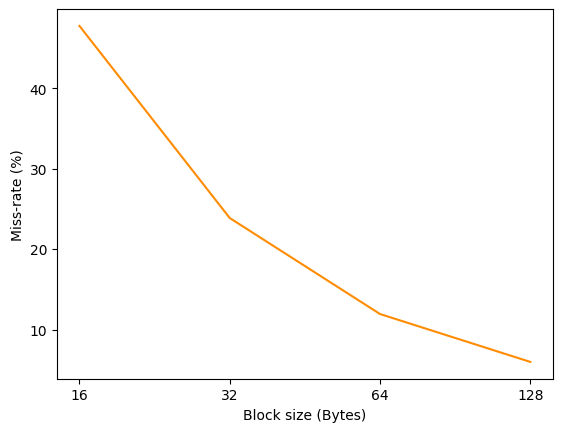

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

x = [16, 32, 64, 128]
y = [47.73, 23.86, 11.93, 5.98]

x_ticks = range(len(x))

plt.plot(x_ticks, y, color = "darkorange")
plt.xticks(x_ticks, x)

plt.xlabel("Block size (Bytes)")
plt.ylabel("Miss-rate (%)")


### d)
From the obtained results, select the block size that offers the best trade-off between the resulting average miss-rate and the time penalty associated with each data fetch from the primary memory. \
Justify.

---

**L2 Block Size:** 128 Bytes \
Como a miss-penalty não é afetada pela dimensão do bloco, faz sentido escolher o bloco com menor miss-rate, ou seja, o de 128 bytes.

## 2.4.2 Cache L2:

### a)
Evaluate the compulsory, capacity, conflict and total miss-rates for the direct-mapped L2 data cache.\
Fill the following table with the obtained data:

---

In [7]:
import pandas as pd

# L2 fetches: 454065
# compulsory misses: 594
# capacity misses: 994
# conflict misses: 0
# total misses: 1588

L2_config = {"Miss-Rate": [0.3741, 0.6259, 0, 0.05975]}

df = pd.DataFrame(L2_config, index = ["Compulsory", "Capacity", "Conflict", "Total"])

display(df)

,Miss-Rate
Compulsory,0.37410
Capacity,0.62590
Conflict,0.00000
Total,0.05975


### b)
Plot the variation of the obtained compulsory, capacity, conflict and total miss-rate.

---

Text(0, 0.5, 'Miss-rate (%)')

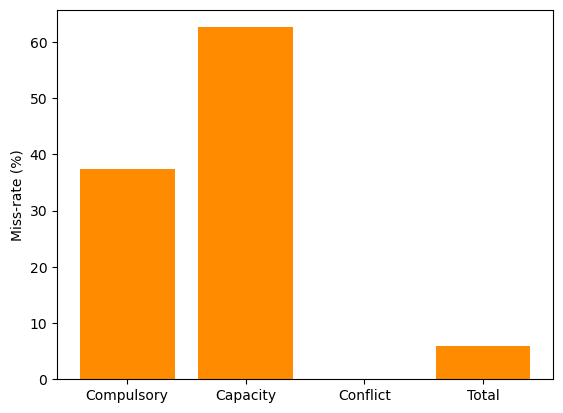

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

L2_config = {"Compulsory": 37.41, "Capacity": 62.59, "Conflict": 0, "Total": 5.975}

x = list(L2_config.keys())
y = list(L2_config.values())

plt.bar(x, y, color = "darkorange")
plt.ylabel("Miss-rate (%)")

### c)
Write the expression which provides the mean access time as a function of the L1 and L2 cache hit $(p^{L1}_H, p^{L2}_H)$ and miss $(p^{L1}_M, p^{L2}_M)$ rates, L1 and L2 cache hit $(t^{L1}_H, t^{L2}_H)$ and miss $(t^{L1}_M, t^{L2}_M)$ access times, and the time penalty, as expressed in table 1.

---

$AMAT = (t^{L1}_H) + (p^{L1}_M) \times Miss_{penalty}L1 \leftrightarrow \\
AMAT = (t^{L1}_H) + (p^{L1}_M) \times [(t^{L2}_H) + (p^{L2}_M) \times Miss_{penalty}L2] \leftrightarrow \\
AMAT = (t^{L1}_H) + (p^{L1}_M) \times [(t^{L2}_H) + (p^{L2}_M) \times 140] \leftrightarrow \\
AMAT = 2 \times [0.7 + 0.35 \times \log_2 (\#ways)] + (p^{L1}_M) \times [10 \times [0.7 + 0.55 \times \log_2 (\#ways)] + (p^{L2}_M) \times 140]$

### d)
Evaluate the mean access time provided by the chosen configuration, considering the obtained miss-rate and the time penalty. Evaluate the resulting cost function, as defined in Eq. 1. \
Fill the following table with the obtained data:

---

In [3]:
import pandas as pd

# L2 price: (16 * 0.00097656) * 0.4 = 0.00625
# L2 #ways = 1

# Hierarchy_price = L1_price + L2_price + SDRAM_price = 0.0097656 + 0.00625 + 0.00125 = 0.0172656

L2_config = {"": [0.05975, "2.825 ns", "0.0172656", 0.04878]}

df = pd.DataFrame(L2_config, index = ["Miss-Rate", "Access time", "Price", "Cost Function"])

display(df)

,
Miss-Rate,0.05975
Access time,2.825 ns
Price,0.0172656
Cost Function,0.04878


## 2.5 Memory Hierarchy Configuration

### a)
By considering the obtained results, fill the following table with the selected characteristics for L1 and L2 cache memories, as well as the corresponding performance results of the overall memory hierarchy.

---

In [1]:
import pandas as pd

cache_config = {"Cache L1": [1024, 16, 4, "write-through / write-not-allocate", 0.16, 0.0097656],
                "Cache L2": ["16 x 1024 (16384)", 128, 1, "write-back / write-allocate", 5.98, 0.00625],
                "Frame-Memory": ["128 x 1024", "-", "-", "-", "-", 0.00125]}

cache_config_global = {"": [0.9568, 2.825, 0.0172656, 0.04878]}

df_1 = pd.DataFrame(cache_config, index = ["Dimension [Bytes]:", "Block size [Bytes]:", "Associativity:", "Write-policy:",
                                           "Local Miss-Rate [%]:", "Price [€]:"])

df_2 = pd.DataFrame(cache_config_global, index = ["Global Miss-Rate [%]:", "Global Access time [ns]:", "Total Price [€]:",
                                                  "COST FUNCTION [ns x €]:"])

display(df_1)
display(df_2)

,Cache L1,Cache L2,Frame-Memory
Dimension [Bytes]:,1024,16 x 1024 (16384),128 x 1024
Block size [Bytes]:,16,128,-
Associativity:,4,1,-
Write-policy:,write-through / write-not-allocate,write-back / write-allocate,-
Local Miss-Rate [%]:,0.16,5.98,-
Price [€]:,0.009766,0.00625,0.00125


,
Global Miss-Rate [%]:,0.956800
Global Access time [ns]:,2.825000
Total Price [€]:,0.017266
COST FUNCTION [ns x €]:,0.048780
